In [110]:
# Basics
import pandas as pd
import numpy as np

# Viz
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# M Algorithms
from sklearn.ensemble import VotingClassifier,AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

# Evaluation
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


In [94]:
# sns.set_style('darkgrid')
# matplotlib.rcParams['font.size'] = 14
# matplotlib.rcParams['figure.figsize'] = (10, 6)
# matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
df = pd.read_csv("SaYoPillow2.csv")

In [3]:
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [107]:
df.describe()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


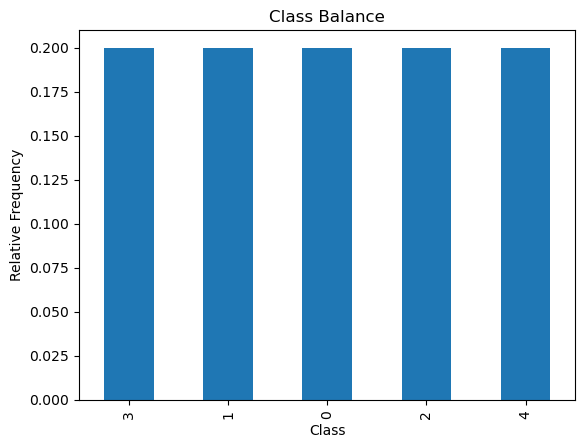

In [20]:
# Plot value counts of `"stress level"`
df["sl"].value_counts(normalize=True).plot(
    kind="bar", xlabel="Class", ylabel="Relative Frequency", title="Class Balance"
);

In [4]:
target = "sl"

In [5]:
X = df.drop(target, axis=1)
y = df[target]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (504, 8)
y_train shape: (504,)
X_test shape: (126, 8)
y_test shape: (126,)


In [109]:
clf_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(clf_baseline, 2))

Baseline Accuracy: 0.2


In [7]:
# Random Forest
rf = RandomForestClassifier(random_state=42)

In [8]:
cv_acc_score = cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1)
print(cv_acc_score)

[0.98019802 1.         1.         0.99009901 0.98      ]


In [9]:
params = {
    "n_estimators": range(25,100,25),
    "max_depth": range(10,50,10)
}
params

{'n_estimators': range(25, 100, 25), 'max_depth': range(10, 50, 10)}

Now that we have our hyperparameter grid, lets incorporate it into a grid search

In [10]:
grid_model = GridSearchCV(
    rf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [11]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [12]:
cv_results = pd.DataFrame(grid_model.cv_results_)
cv_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.441606,0.032075,0.057594,0.014183,10,25,"{'max_depth': 10, 'n_estimators': 25}",0.990099,1.0,1.0,0.990099,0.98,0.992040,0.007473,1
1,0.819954,0.033948,0.099768,0.027751,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.980198,1.0,1.0,0.990099,0.98,0.990059,0.008900,5
2,1.209343,0.041602,0.129481,0.014970,10,75,"{'max_depth': 10, 'n_estimators': 75}",0.980198,1.0,1.0,0.990099,0.98,0.990059,0.008900,5
3,0.416447,0.016791,0.057212,0.012113,20,25,"{'max_depth': 20, 'n_estimators': 25}",0.990099,1.0,1.0,0.990099,0.98,0.992040,0.007473,1
4,0.953042,0.115531,0.120854,0.038584,20,50,"{'max_depth': 20, 'n_estimators': 50}",0.980198,1.0,1.0,0.990099,0.98,0.990059,0.008900,5


In [13]:
mask = cv_results["param_max_depth"] == 10
cv_results[mask]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.441606,0.032075,0.057594,0.014183,10,25,"{'max_depth': 10, 'n_estimators': 25}",0.990099,1.0,1.0,0.990099,0.98,0.992040,0.007473,1
1,0.819954,0.033948,0.099768,0.027751,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.980198,1.0,1.0,0.990099,0.98,0.990059,0.008900,5
2,1.209343,0.041602,0.129481,0.014970,10,75,"{'max_depth': 10, 'n_estimators': 75}",0.980198,1.0,1.0,0.990099,0.98,0.990059,0.008900,5


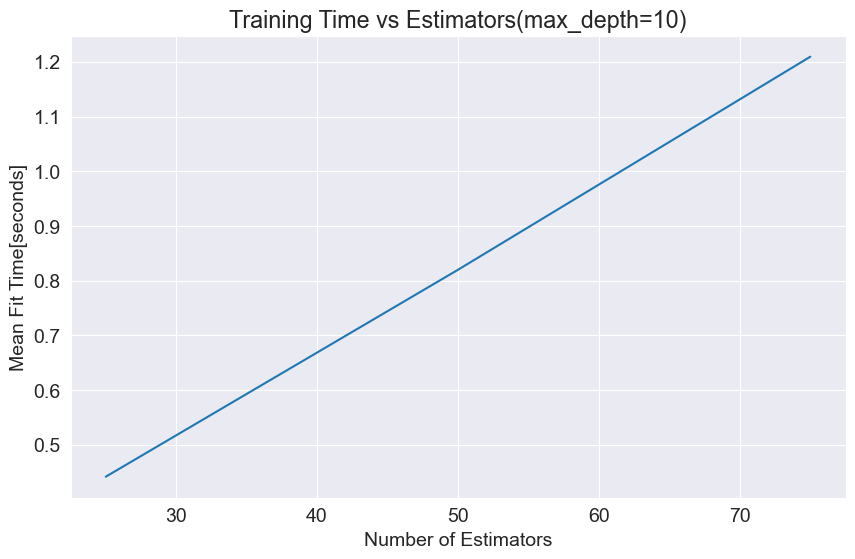

In [95]:
# plot fit time vs n_estimator
mask = cv_results["param_max_depth"] == 10
plt.plot(
    cv_results[mask]["param_n_estimators"],
    cv_results[mask]["mean_fit_time"]
)
# Label Axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time[seconds]")
plt.title("Training Time vs Estimators(max_depth=10)")
plt.show()

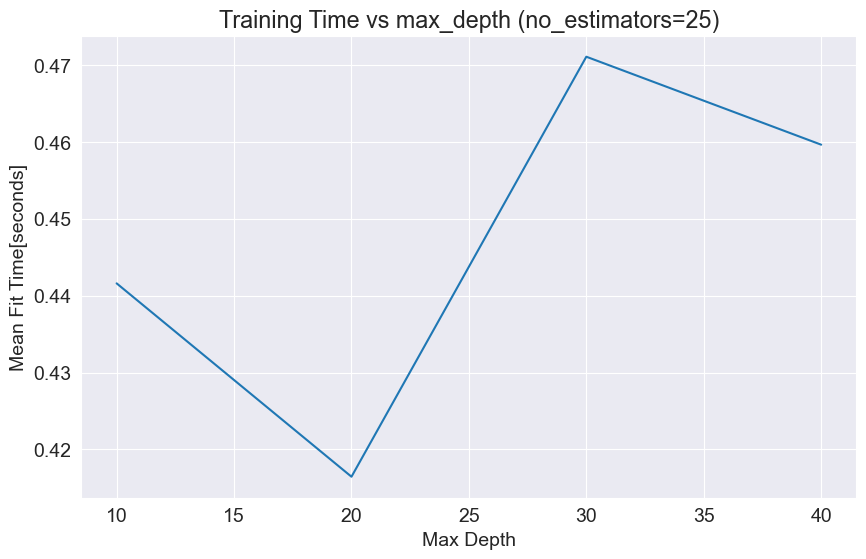

In [96]:
# plot fit time vs max_depth
mask = cv_results["param_n_estimators"] == 25
plt.plot(
    cv_results[mask]["param_max_depth"],
    cv_results[mask]["mean_fit_time"]
)
# Label Axes
plt.xlabel("Max Depth")
plt.ylabel("Mean Fit Time[seconds]")
plt.title("Training Time vs max_depth (no_estimators=25)")
plt.show()

In [16]:
grid_model.best_params_

{'max_depth': 10, 'n_estimators': 25}

In [17]:
grid_model.best_score_

0.9920396039603961

In [99]:
grid_model.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=25, random_state=42)

In [98]:
acc_train = grid_model.score(X_train,y_train)
acc_test = grid_model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Testing Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Testing Accuracy: 0.9762


In [106]:
# Classification report
print(classification_report(y_test, grid_model.predict(X_test),digits=4))

              precision    recall  f1-score   support

           0     0.9200    1.0000    0.9583        23
           1     1.0000    0.9167    0.9565        24
           2     1.0000    1.0000    1.0000        28
           3     1.0000    0.9615    0.9804        26
           4     0.9615    1.0000    0.9804        25

    accuracy                         0.9762       126
   macro avg     0.9763    0.9756    0.9751       126
weighted avg     0.9778    0.9762    0.9762       126



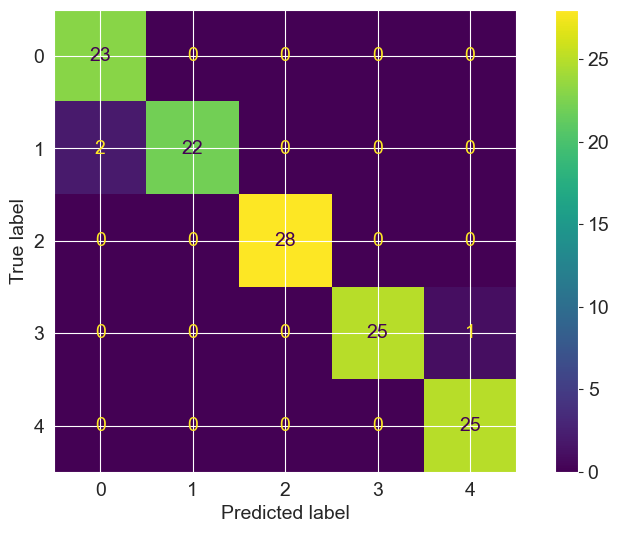

In [111]:
# Plot confusion Matrix
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test);

In [28]:
features = X_train.columns

In [29]:
importances =grid_model.best_estimator_.feature_importances_

In [31]:
feat_imp = pd.Series(importances, index=features).sort_values()
feat_imp

sr.1    0.079127
rr      0.089720
rem     0.099968
sr      0.108847
bo      0.119410
hr      0.141555
lm      0.170632
t       0.190740
dtype: float64

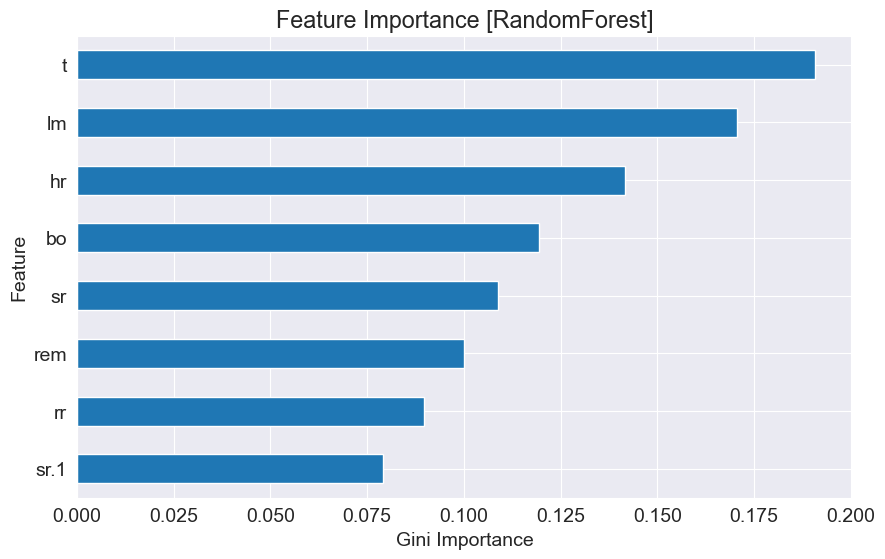

In [116]:
# Get feature names from training data
features = X_train.columns
# Extract importances from model
importances = grid_model.best_estimator_.feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()
# Plot 10 most important features
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance [RandomForest]");

# Model 2: GradientBoost

In [56]:
gb = GradientBoostingClassifier()

In [61]:
params = {
    "learning_rate": [0.1,0.2,0.3],
    "max_depth": range(2,5),
    "n_estimators": range(20,31,5)  
}
params

{'learning_rate': [0.1, 0.2, 0.3],
 'max_depth': range(2, 5),
 'n_estimators': range(20, 31, 5)}

In [62]:
gb_model = GridSearchCV(gb, params, cv=5, n_jobs=-1, verbose=1)

In [63]:
gb_model.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': range(2, 5),
                         'n_estimators': range(20, 31, 5)},
             verbose=1)

In [64]:
results = pd.DataFrame(gb_model.cv_results_)
results.sort_values("rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
26,3.488692,0.898382,0.026790,0.017342,0.3,4,30,"{'learning_rate': 0.3, 'max_depth': 4, 'n_esti...",0.980198,1.000000,1.0,0.980198,0.99,0.990079,0.008856,1
24,2.278384,0.128496,0.020369,0.013100,0.3,4,20,"{'learning_rate': 0.3, 'max_depth': 4, 'n_esti...",0.980198,1.000000,1.0,0.980198,0.99,0.990079,0.008856,1
19,2.745164,0.208092,0.027885,0.017870,0.3,2,25,"{'learning_rate': 0.3, 'max_depth': 2, 'n_esti...",0.980198,0.990099,1.0,0.990099,0.99,0.990079,0.006262,1
6,4.685755,0.666713,0.013212,0.003060,0.1,4,20,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.980198,1.000000,1.0,0.980198,0.99,0.990079,0.008856,1
13,3.223022,0.284108,0.017739,0.001882,0.2,3,25,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.980198,1.000000,1.0,0.990099,0.98,0.990059,0.008900,5
15,2.449439,0.237160,0.014645,0.004514,0.2,4,20,"{'learning_rate': 0.2, 'max_depth': 4, 'n_esti...",0.970297,1.000000,1.0,0.990099,0.98,0.988079,0.011574,6
9,4.985789,1.656057,0.055924,0.040474,0.2,2,20,"{'learning_rate': 0.2, 'max_depth': 2, 'n_esti...",0.970297,1.000000,1.0,0.990099,0.98,0.988079,0.011574,6
4,3.675427,1.396976,0.036517,0.033050,0.1,3,25,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.980198,1.000000,1.0,0.980198,0.98,0.988079,0.009734,6
17,4.063955,0.577097,0.020834,0.008833,0.2,4,30,"{'learning_rate': 0.2, 'max_depth': 4, 'n_esti...",0.980198,1.000000,1.0,0.990099,0.97,0.988059,0.011638,9
12,2.823997,0.288059,0.034447,0.010100,0.2,3,20,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.980198,1.000000,1.0,0.990099,0.97,0.988059,0.011638,9


In [67]:
# Best Hyperparameter
gb_model.best_estimator_

GradientBoostingClassifier(max_depth=4, n_estimators=20)

In [68]:
gb_model.best_score_

0.9900792079207921

In [70]:
acc1_train = gb_model.score(X_train,y_train)
acc1_test = gb_model.score(X_test,y_test)

print("Training Accuracy:", round(acc1_train, 4))
print("Testing Accuracy:", round(acc1_test, 4))

Training Accuracy: 1.0
Testing Accuracy: 0.9762


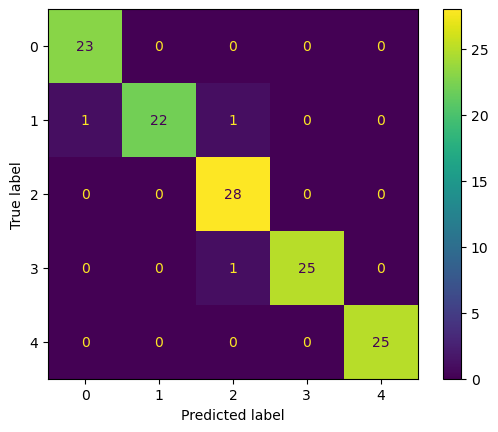

In [71]:
# Plot confusion Matrix
ConfusionMatrixDisplay.from_estimator(gb_model, X_test, y_test);

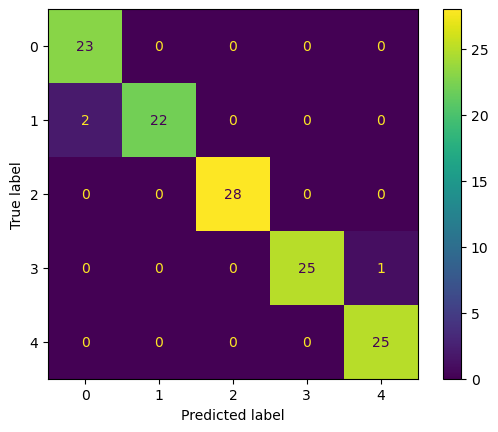

In [79]:
# Plot confusion Matrix
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test);

In [112]:
# Classification report
print(classification_report(y_test, gb_model.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.9583    1.0000    0.9787        23
           1     1.0000    0.9167    0.9565        24
           2     0.9333    1.0000    0.9655        28
           3     1.0000    0.9615    0.9804        26
           4     1.0000    1.0000    1.0000        25

    accuracy                         0.9762       126
   macro avg     0.9783    0.9756    0.9762       126
weighted avg     0.9776    0.9762    0.9761       126



In [104]:
# Classification report
print(classification_report(y_test, grid_model.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.9200    1.0000    0.9583        23
           1     1.0000    0.9167    0.9565        24
           2     1.0000    1.0000    1.0000        28
           3     1.0000    0.9615    0.9804        26
           4     0.9615    1.0000    0.9804        25

    accuracy                         0.9762       126
   macro avg     0.9763    0.9756    0.9751       126
weighted avg     0.9778    0.9762    0.9762       126



In [86]:
# Hybrid of RF and GB
clf1 = RandomForestClassifier(max_depth=10, n_estimators=25, random_state=42)
clf2 = GradientBoostingClassifier(max_depth=4, n_estimators=20)
clf = VotingClassifier([('rf', clf1), ('gb', clf2)], voting='soft')

In [87]:
clf.fit(X_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=25,
                                                     random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(max_depth=4,
                                                         n_estimators=20))],
                 voting='soft')

In [89]:
acc_train = clf.score(X_train,y_train)
acc_test = clf.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Testing Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Testing Accuracy: 0.9841


In [103]:
# Classification report
print(classification_report(y_test, clf.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.9583    1.0000    0.9787        23
           1     1.0000    0.9583    0.9787        24
           2     1.0000    1.0000    1.0000        28
           3     1.0000    0.9615    0.9804        26
           4     0.9615    1.0000    0.9804        25

    accuracy                         0.9841       126
   macro avg     0.9840    0.9840    0.9836       126
weighted avg     0.9848    0.9841    0.9841       126



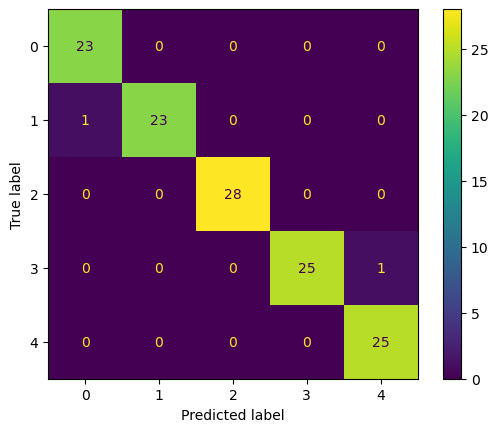

In [91]:
# Plot confusion Matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test);

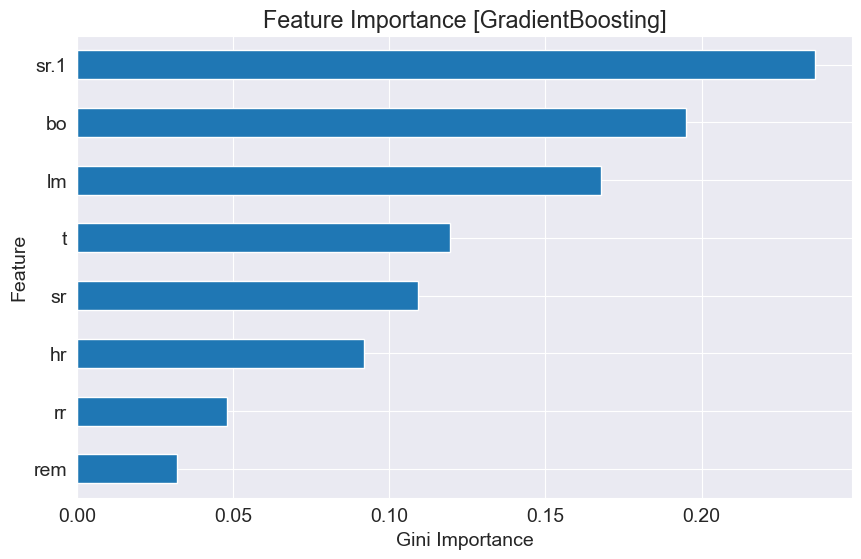

In [115]:
# Get feature names from training data
features = X_train.columns
# Extract importances from model
importances = gb_model.best_estimator_.feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()
# Plot 10 most important features
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance [GradientBoosting]");

In [117]:
# Save Model
import pickle
with open("stressor.pkl", "wb") as f:
    pickle.dump("stressor",f)

NameError: name 'stressor' is not defined